<a href="https://colab.research.google.com/github/JulioHenri/Analise_multivariada_2/blob/main/multi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando libs e os dados

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm 

%matplotlib inline

In [2]:
df = pd.read_excel('HATCO.xlsx')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X9bin
0,1.8,3.0,6.3,6.6,2.5,4.0,8.4,LARGE,43,4.3,0
1,3.4,5.2,5.7,6.0,4.3,2.7,8.2,LARGE,48,5.2,1
2,2.7,1.0,7.1,5.9,1.8,2.3,7.8,LARGE,32,3.9,0
3,1.9,3.3,7.9,4.8,2.6,1.9,9.7,LARGE,45,4.4,0
4,1.3,4.2,6.2,5.1,2.8,2.2,6.9,LARGE,44,4.3,0


#Explorando os dados

In [4]:
df.info() #informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      101 non-null    float64
 1   X2      101 non-null    float64
 2   X3      101 non-null    float64
 3   X4      101 non-null    float64
 4   X5      101 non-null    float64
 5   X6      101 non-null    float64
 6   X7      101 non-null    float64
 7   X8      101 non-null    object 
 8   X9      101 non-null    int64  
 9   X10     101 non-null    float64
 10  X9bin   101 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 8.8+ KB


Não há valores nulos, banco majoritariamente quantitativo, 11 colunas e 101 registros.

In [5]:
df.describe() #medidas estatísticas

,X1,X2,X3,X4,X5,X6,X7,X9,X10,X9bin
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.519802,2.349505,7.905941,5.249505,2.910891,2.664356,6.974257,46.099010,4.774257,0.554455
std,1.314992,1.198551,1.384761,1.125844,0.749253,0.767018,1.577635,8.943718,0.851898,0.499505
min,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,25.000000,3.200000,0.000000
25%,2.500000,1.400000,6.700000,4.600000,2.400000,2.200000,5.800000,39.000000,4.100000,0.000000
50%,3.400000,2.100000,8.100000,5.000000,3.000000,2.600000,7.200000,46.000000,4.900000,1.000000
75%,4.600000,3.200000,9.100000,6.000000,3.400000,3.000000,8.300000,53.000000,5.400000,1.000000
max,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,65.000000,6.800000,1.000000


#1 questão)

In [10]:
#separando as variáveis explicativas da variável target
x = df.drop(['X8','X9','X10','X9bin'], axis = 1)
y = df['X8']

In [26]:
#separando em treino e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((75, 7), (75,), (26, 7), (26,))

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
#instanciando e treinando 
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
#fazendo a previsão
y_pred = clf.predict(x_test)
y_pred

array(['LARGE', 'LARGE', 'SMALL', 'SMALL', 'SMALL', 'SMALL', 'SMALL',
       'LARGE', 'SMALL', 'SMALL', 'SMALL', 'LARGE', 'SMALL', 'SMALL',
       'LARGE', 'LARGE', 'SMALL', 'LARGE', 'SMALL', 'LARGE', 'LARGE',
       'SMALL', 'SMALL', 'LARGE', 'SMALL', 'LARGE'], dtype='<U5')

In [33]:
y_test = np.array(y_test)
y_test

array(['LARGE', 'SMALL', 'LARGE', 'SMALL', 'SMALL', 'SMALL', 'SMALL',
       'SMALL', 'SMALL', 'SMALL', 'LARGE', 'LARGE', 'SMALL', 'SMALL',
       'SMALL', 'LARGE', 'LARGE', 'LARGE', 'SMALL', 'LARGE', 'SMALL',
       'SMALL', 'SMALL', 'SMALL', 'SMALL', 'SMALL'], dtype=object)

In [36]:
#criando matriz de confusão c os valores reais e os previstos
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 5,  3],
       [ 6, 12]])

In [39]:
#avaliando o modelo
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.6538461538461539

A acurácia é definida pela razão entre o que o modelo previu corretamente e todos os exemplos. Ou seja, o modelo previu 65% dos registros nas suas classes corretas.

#2 questão)

##COMPARANDO REGRESSÕES LINEARES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


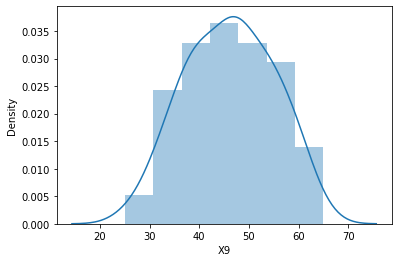

In [44]:
sns.distplot(df.X9) #observando a distribuição da variável y

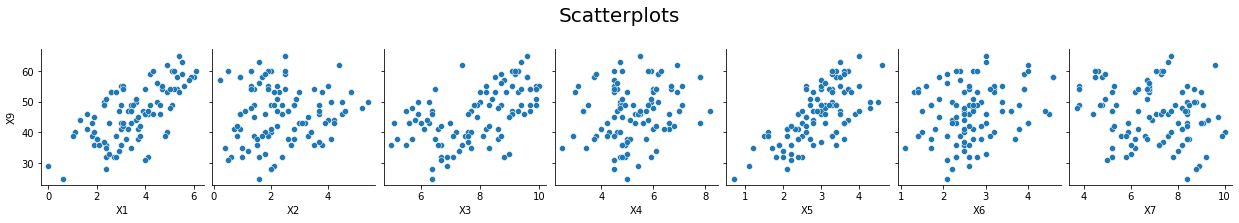

In [54]:
#observando se há relações lineares com a variável x9
ax = sns.pairplot(df, y_vars='X9', x_vars=['X1','X2','X3','X4','X5','X6','X7'])
ax.fig.suptitle('Scatterplots', fontsize=20, y=1.2)
ax

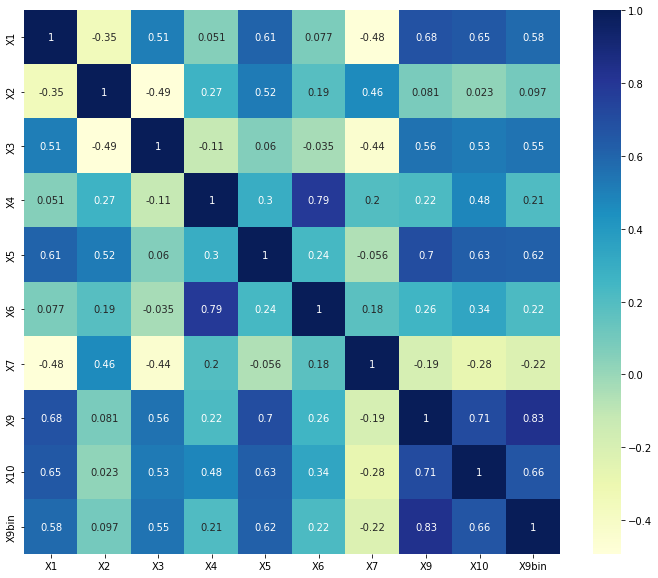

In [65]:
#visualizando as correlações
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

In [66]:
#observando as variáveis mais correlacionadas com x9
cor = df.corr()
cor_target = abs(cor['X9'])

relevant_features = cor_target[cor_target>0.5]
relevant_features = relevant_features[:3]
relevant_features

X1    0.675969
X3    0.556839
X5    0.699125
Name: X9, dtype: float64

In [50]:
#separando as variáveis explicativas da variável target
x = df.drop(['X8','X9','X10','X9bin'], axis = 1)
y = df['X9']

In [51]:
#separando em treino e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((75, 7), (75,), (26, 7), (26,))

In [52]:
#estimando o modedlo
modelo_sm = sm.OLS(y_train, x_train, hascont = True).fit()

In [53]:
#método dos mínimos quadrados
modelo_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     X9   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1119.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                    1.36e-67
Time:                        22:55:02   Log-Likelihood:                         -217.08
No. Observations:                  75   AIC:                                      448.2
Df Residuals:                      68   BIC:                                      464.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.9062      2.194      0.413      0.681      -3.473       5.285
X2            -0.0368      2.273     -0.016      0.987      -4.573       4.500
X3             2.3893      0.352      6.787      0.000       1.687       3.092
X4            -0.7051      0.781     -0.903      0.370      -2.263       0.853
X5             7.2883      4.237      1.720      0.090      -1.167      15.743
X6             1.5610      1.153      1.354      0.180      -0.740       3.862
X7             0.4154      0.366      1.134      0.261      -0.316       1.146
==============================================================================
Omnibus:                        8.850   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.940
Skew:                          -0.841   Prob(JB):                       0.0114
Kurtosis:                       3.183   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#método Machine Learning
model = LinearRegression()
model.fit(x_train, y_train)

predict = model.predict(x_test)

In [69]:
# determinando o r^2
print('R² = {}'.format(metrics.r2_score(y_test,
                                        predict).round(3)))

R² = 0.692


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


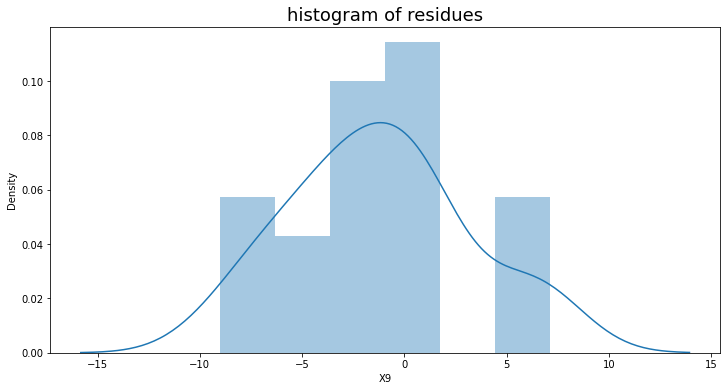

In [71]:
#observando os residuos
residues = y_test - predict

ax = sns.distplot(residues)
ax.figure.set_size_inches(12, 6)
ax.set_title('histogram of residues', fontsize=18)
ax

Conclusão: Usando o R ao quadrado como métrica de avaliação, o método dos mínimos quadrados ordinários se mostrou o melhor modelo de regressão comparado ao método de aprendizado de máquina. 

##REGRESSÃO LOGÍSTICA

In [79]:
y = df['X9bin']

#separando em treino e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape,y_test.shape


((75, 7), (75,), (26, 7), (26,))

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #instanciando o modelo
model.fit(x_train, y_train) #treinando

y_pred = model.predict(x_test) #predição
print('A acurácia é: {:.4}%'.format(accuracy_score(y_test, y_pred)*100))

A acurácia é: 88.46%
